##### **Import libraries**
We first import the necessary libraries needed for analysis:
-  `numpy`:  for array munipulation
-  `pandas`: for arranging data in a dataframe format, with rows and columns munipulation
-  `pyplot` from `matplotlib`: for data visualization
-   `sklearn` : for ML model implementation, data processing and inference 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

#### **Import dataset**
This stage consist of importing the dataset and visualizing it. It gives an overview of what the data  looks like

In [2]:
# import dataset
file_path = ('B:\_GITHUB\Machine-Learning-project-series\logistic regression\heart disease prediction\dataset\heart_disease.csv')
data = pd.read_csv(file_path)
data.head()
# print(data.to_markdown())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#### **data Info**
It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

- **age**: The person's age in years
- **sex**: The person's sex (1 = male, 0 = female)
- **cp**: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- **trestbps**: The person's resting blood pressure (mm Hg on admission to the hospital)
- **chol**: The person's cholesterol measurement in mg/dl
- **fbs**: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- **restecg**: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- **thalach**: The person's maximum heart rate achieved
- **exang**: Exercise induced angina (1 = yes; 0 = no)
- **oldpeak**: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
- **slope**: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- **ca**: The number of major vessels (0-3)
- **thal**: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- **target**: Heart disease (0 = no, 1 = yes)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
# Changing data to default
# renaming the sex to male and female
#data.loc[data['sex'] == 1, 'sex'] = 'male'
#data['sex'].mask(data['sex'] == 1, 'male', inplace=True)
# data['sex'] = np.where(data['sex'] == 1, 'male','female')

# # changing chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
# data.loc[data['cp'] == 1, 'cp'] = 'typical angina'
# data.loc[data['cp'] == 2, 'cp'] = 'atypical angina'
# data.loc[data['cp'] == 3, 'cp'] = 'non-anginal pain'
# data.loc[data['cp'] == 4, 'cp'] = 'asymptomtic'
# data.loc[data['cp'] == 0, 'cp'] = 'symptomtic'

# # The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
# data['fbs'] = np.where(data['fbs'] == 1, 'true', 'false')

# # exang: Exercise induced angina (1 = yes; 0 = no)
# data['exang'] = np.where(data['exang'] == 1, 'true', 'false')

# # slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
# data.loc[data['slope'] == 0, 'slope'] = 'nosloping'
# data.loc[data['slope'] == 1, 'slope'] = 'upsloping'
# data.loc[data['slope'] == 2, 'slope'] = 'flat'
# data.loc[data['slope'] == 3, 'slope'] = 'downsloping'

# # thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
# data.loc[data['thal'] == 3, 'thal'] = 'normal'
# data.loc[data['thal'] == 6, 'thal'] = 'fixed defect'
# data.loc[data['thal'] == 7, 'thal'] = 'reversable defect'
# data.loc[data['thal'] == 2, 'thal'] = 'defect'
# data.loc[data['thal'] == 1, 'thal'] = 'abnormal'

# # target: Heart disease (0 = no, 1 = yes)
# data['target'] = np.where(data['target'] == 1, 'cancer', 'no cancer')

# data.head(50)

In [5]:
# pd.set_option("display.max_rows",10)
pd.set_option("display.float_format",'{:.1f}'.format)
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0
mean,54.4,0.7,0.9,131.6,246.0,0.1,0.5,149.1,0.3,1.1,1.4,0.8,2.3,0.5
std,9.1,0.5,1.0,17.5,51.6,0.4,0.5,23.0,0.5,1.2,0.6,1.0,0.6,0.5
min,29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,48.0,0.0,0.0,120.0,211.0,0.0,0.0,132.0,0.0,0.0,1.0,0.0,2.0,0.0
50%,56.0,1.0,1.0,130.0,240.0,0.0,1.0,152.0,0.0,0.8,1.0,0.0,2.0,1.0
75%,61.0,1.0,2.0,140.0,275.0,0.0,1.0,166.0,1.0,1.8,2.0,1.0,3.0,1.0
max,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.2,2.0,4.0,3.0,1.0


In [6]:
data.mean()

age         54.4
sex          0.7
cp           0.9
trestbps   131.6
chol       246.0
fbs          0.1
restecg      0.5
thalach    149.1
exang        0.3
oldpeak      1.1
slope        1.4
ca           0.8
thal         2.3
target       0.5
dtype: float64

#### **Data visualization**
We perform this stage in order to vizualize and understand the data and the relationship between various feautures.
1. **histogram**: t provides us a count of the number of observations in each bin created for visualization. From the shape of the bin, we can easily observe the distribution i.e. weather it is Gaussian, skewed or exponential.Histograms also help us to see possible outliers.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

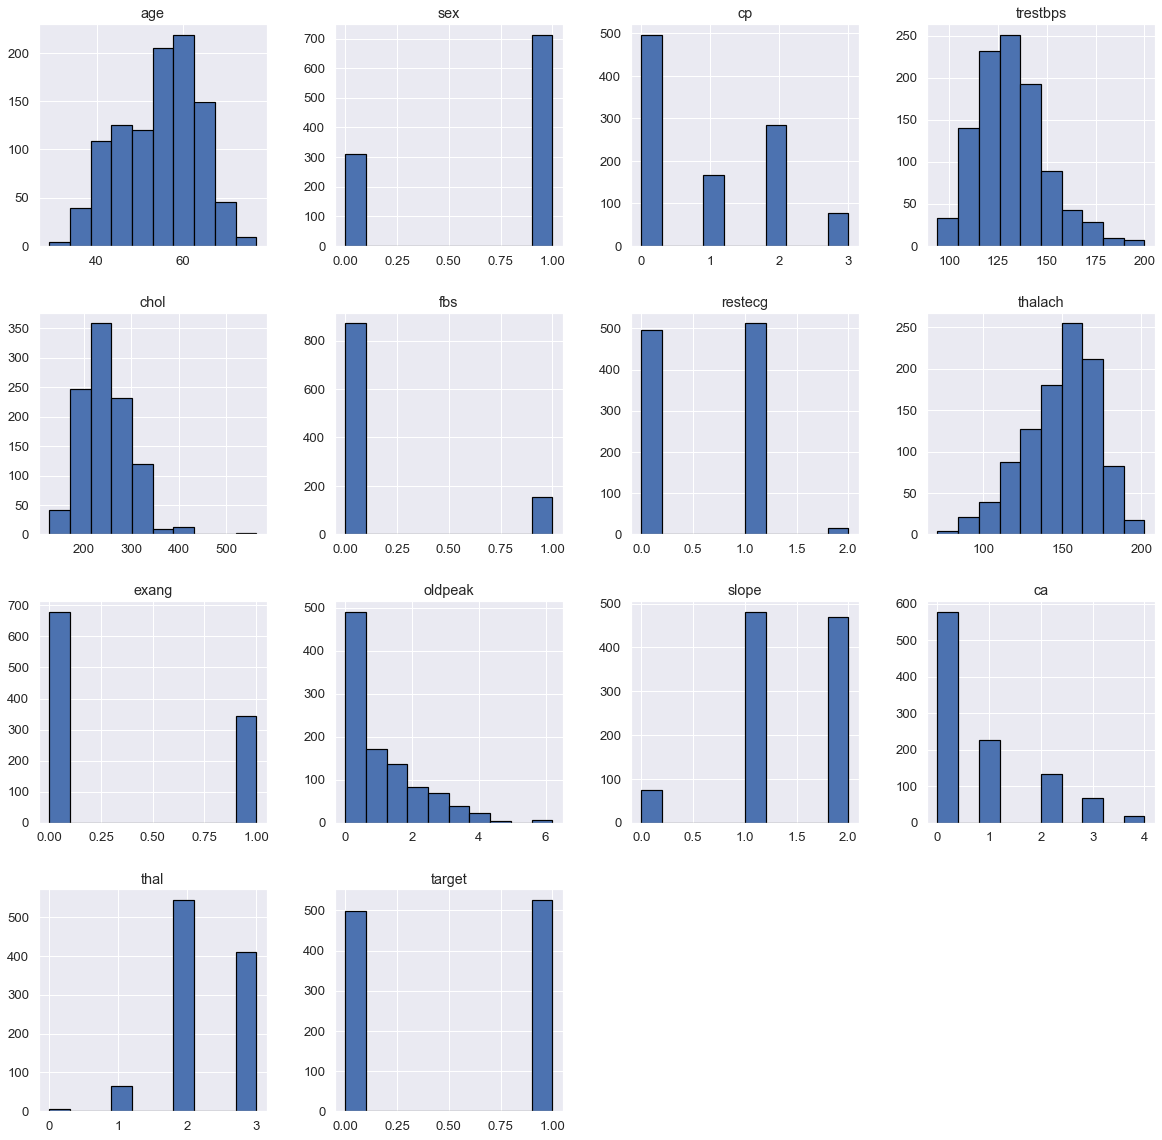

In [7]:
sns.set(font_scale = 1.2)
data.hist(figsize=(20,20), edgecolor="black", linewidth=1.2)

The above output shows the histogram for each attribute in the dataset. From this, we can observe that perhaps `oldpeak` may have exponential distribution while `age` and `thalach`, `trestbps` have Gaussian distribution.

2. **density plot**:
Another quick and easy technique for getting each attributes distribution is Density plots. It is also like histogram but having a smooth curve drawn through the top of each bin.

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

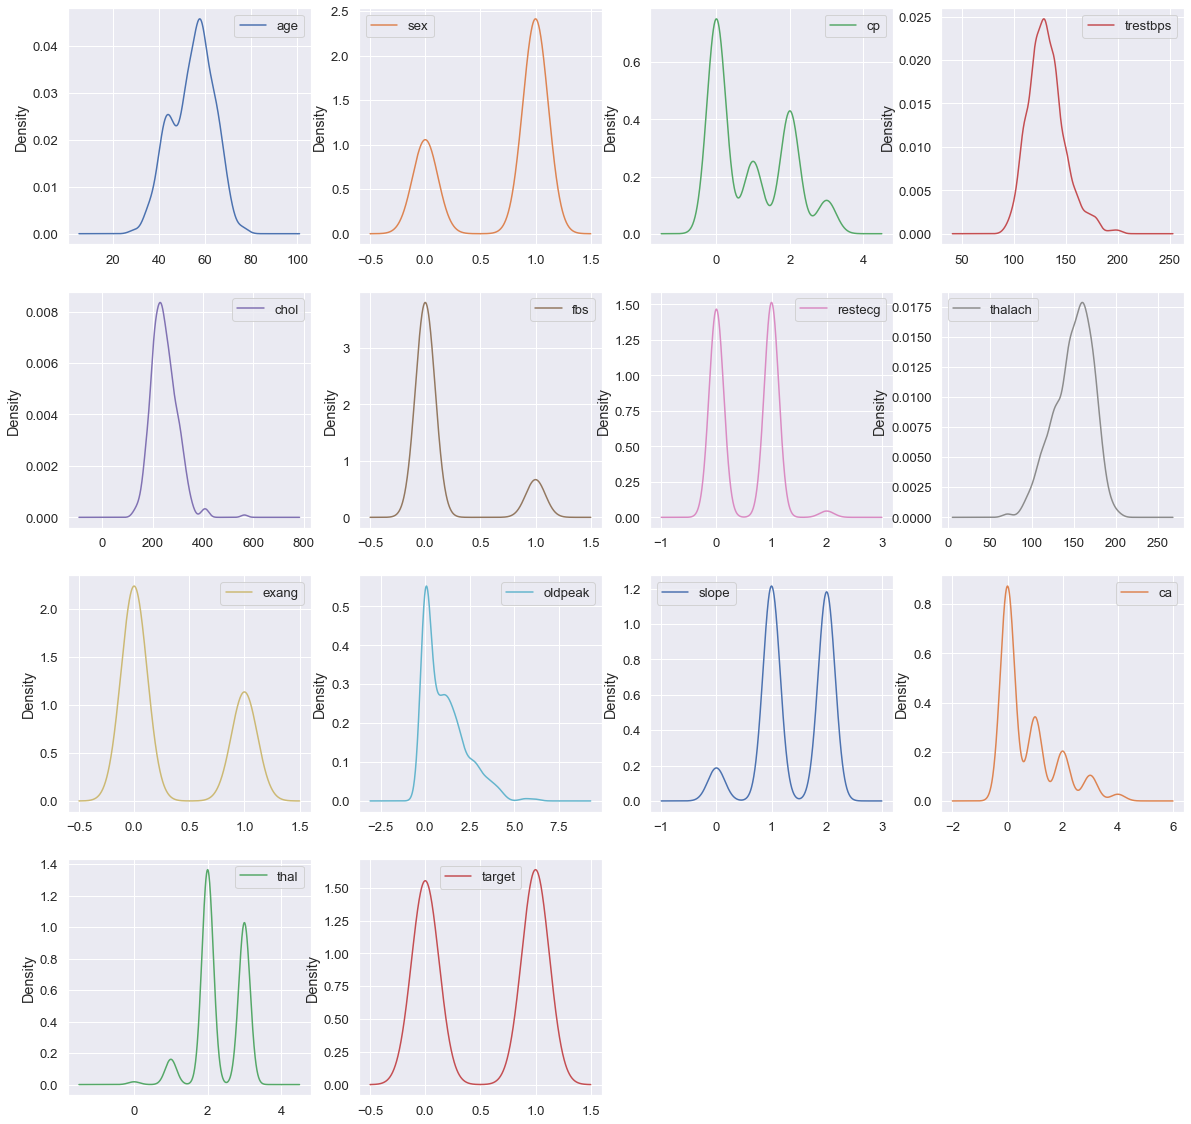

In [8]:
sns.set(font_scale = 1.2)
data.plot(kind="density", subplots=True, layout=(4,4), sharex=False, figsize=(20,20))

3.  **Correlation Matrix Plot**:
We plot the correlation matrix to show which variable is having a high or low correlation in respect to another variable.

In [9]:
correlations = data.corr()
correlations.style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<AxesSubplot:>

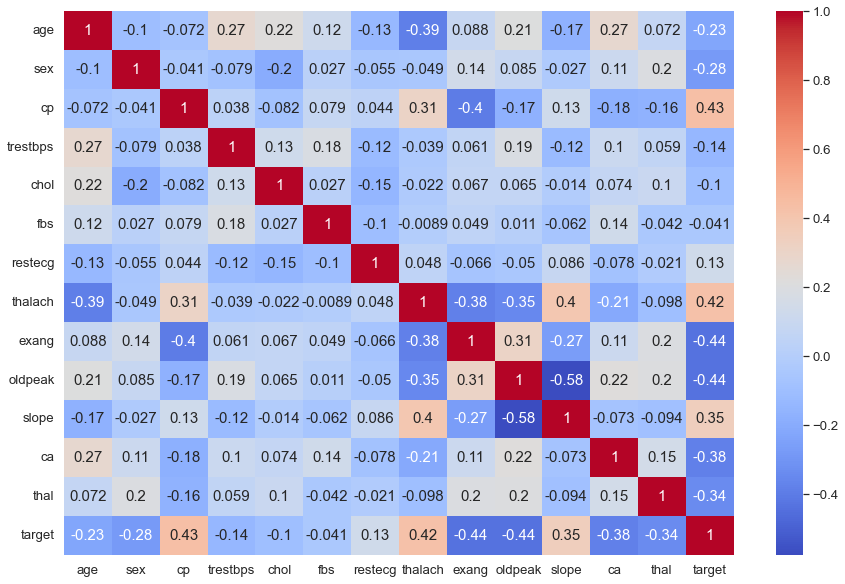

In [10]:

# plt.matshow(correlations)
# plt.yticks(np.arange(data.shape[1]), data.columns)
# plt.xticks(np.arange(data.shape[1]), data.columns)
# plt.colorbar()

corr_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", annot_kws={"size":15})

In the code below we can verify the distribution of the target classes. It is a good practice to verify that, the more balance are
the classes, the better for the model

Text(0.5, 1.0, 'Distribution of Target Class')

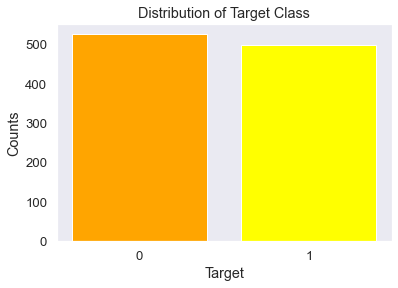

In [11]:
plt.bar(data['target'].unique(), data['target'].value_counts(), color = ['orange','yellow'])
plt.xticks([0, 1])
plt.xlabel("Target")
plt.ylabel("Counts")
plt.grid(False)
plt.title("Distribution of Target Class")

we can observe that the data are almost the same size which is good

#### **Data Processing**
In this stage we are going to perform a series of experiments with the data. 
1. We will keep all the columns, train our model and observe the results.
2. Keep some colums and do the same and observe the result as well

In [12]:
# kepping all the data
# drop NA values
data = data.dropna()
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [13]:
# Data Scaling
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# data_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
# data_rescaled = data_scaler.fit_transform(data)
# data_rescaled[0:10]
# data_rescaled = pd.DataFrame(data_rescaled)

# train model 
# data_shuffle = shuffle(data)
# data = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
# data.head()
scaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])
# data.head()

#### **Create model and passing data to model**
Here, we create an istance of the Logistic regression model and feed the train and test data to the model

In [14]:
y = data['target']
X = data.drop(['target'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state = 0)

model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

#### **Saving model and data (Train and Test)**

In [15]:
# create saving path
if not os.path.exists('data'):
    os.makedirs('data')

#saving train data
train_df = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis= 1).dropna()
train_df.to_csv(os.path.join('data', 'train.csv'), header=False, index=False)
print('path created: ' + str('data') + '/' + str('train.csv')) 

# saving test data
test_df = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test)], axis= 1).dropna()
train_df.to_csv(os.path.join('data', 'test.csv'), header=False, index=False)
print('path created: ' + str('data') + '/' + str('test.csv'))

path created: data/train.csv
path created: data/test.csv


In [16]:
# saving model
import joblib
if not os.path.exists('model'):
    os.makedirs('model')
joblib.dump(model, os.path.join('model', 'model.joblib'))

['model\\model.joblib']

#### **Model Evaluation**
Here we evaluate the model performance.

In [17]:
# load test data
test_dir = 'data'
test_data = pd.read_csv(os.path.join(test_dir, 'test.csv'), header=None, names=None)
# test_data.head()
test_y = test_data.iloc[:,-1:]
# test_y.head()
test_x = test_data.iloc[:,0:-1]
# test_x.head()

In [18]:
test_y_preds = model.predict(test_x)
# print(test_y_preds.shape)
# print(test_y.shape)
accuracy_array = test_y_preds.reshape(686, 1) == test_y
# accuracy_array.info()
# accuracy_array.value_counts()
count = accuracy_array.values.sum()
# print(test_y_preds.shape)
# print(accuracy_array.shape)
false_positives = test_y_preds.reshape(686, 1) - accuracy_array
# print(false_positives)
false_positives_count = false_positives.where(false_positives > 0)

# Accuracy
accuracy = count / len(test_y_preds)
accuracy_score = model.score(X,y)
print('Manual Accuracy: ', accuracy)
print('Accuracy with "model.score": ', accuracy_score)

# recall 
recall = test_y_preds.sum() / test_y.sum()
print('Recall: ', recall)

#precision
precision = test_y_preds.sum() / (test_y.sum() + 0)
print('Precision: ', precision)

# print('predicted class label: ', test_y_preds)
# print('Actual class label: ', test_y.values)

Manual Accuracy:  0.8469387755102041
Accuracy with "model.score":  0.8575609756097561
Recall:  13   1.1
dtype: float64
Precision:  13   1.1
dtype: float64


#### **K Neighbors Classifier**
KNN tries to predict the correct class for the test data by calculating the distance between the test data and all the training points. Then select the K number of points which is closet to the test data. We will plot the result for various K values and observe the result.

In [19]:
# import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier = knn_classifier.fit(X_train, y_train)
    knn_scores.append(round(knn_classifier.score(X_test, y_test), 2))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

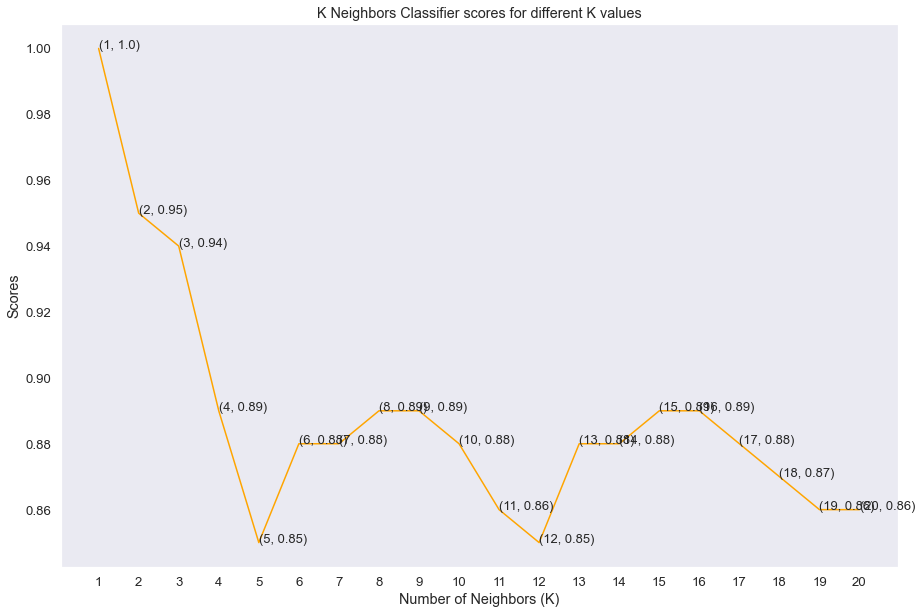

In [20]:
# plotting Knn score
plt.figure(figsize=(15, 10))
plt.grid(False)
plt.plot([k for k in range(1,21)], knn_scores, color='orange')
for i in range(1, 21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]), fontsize=13.0)
plt.xticks([k for k in range(1,21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [21]:
print(f"The score for K Neighbors Classifier is {knn_scores[8]*100}% with {8} neighbors.")

The score for K Neighbors Classifier is 89.0% with 8 neighbors.


### **Support Vector Classifier**
A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems.

In [22]:
from sklearn.svm import SVC

svc_scores = []
kernels = ['rbf', 'linear', 'poly', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(round(svc_classifier.score(X_test, y_test), 2))

Text(0.5, 1.0, 'Support Vector Classifier scores for various Kernels')

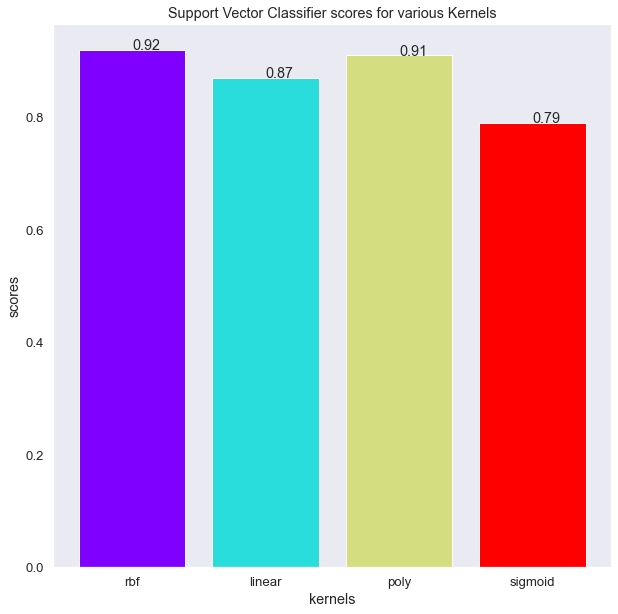

In [26]:
from matplotlib.cm import rainbow

plt.figure(figsize=(10, 10))
plt.grid(False)
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], round(svc_scores[i], 2))
plt.xlabel('kernels')
plt.ylabel('scores')
plt.title('Support Vector Classifier scores for various Kernels')

The __rbf__ kernel achieves the best result as presented in the above graph with a __0.92__ performance

In [24]:
print(f"The score for Support Vector Classifier is {svc_scores[0]*100}% with rbf kernels.")

The score for Support Vector Classifier is 92.0% with rbf kernels.


### __Decision Tree Classifier__
Decision Trees are a type of Supervised Machine Learning (that is you explain what the input is and what the corresponding output is in the training data) where the data is continuously split according to a certain parameter.

In [27]:
from sklearn.tree import DecisionTreeClassifier

dt_scores = []
# print(len(X.columns))
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(round(dt_classifier.score(X_test, y_test),2))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

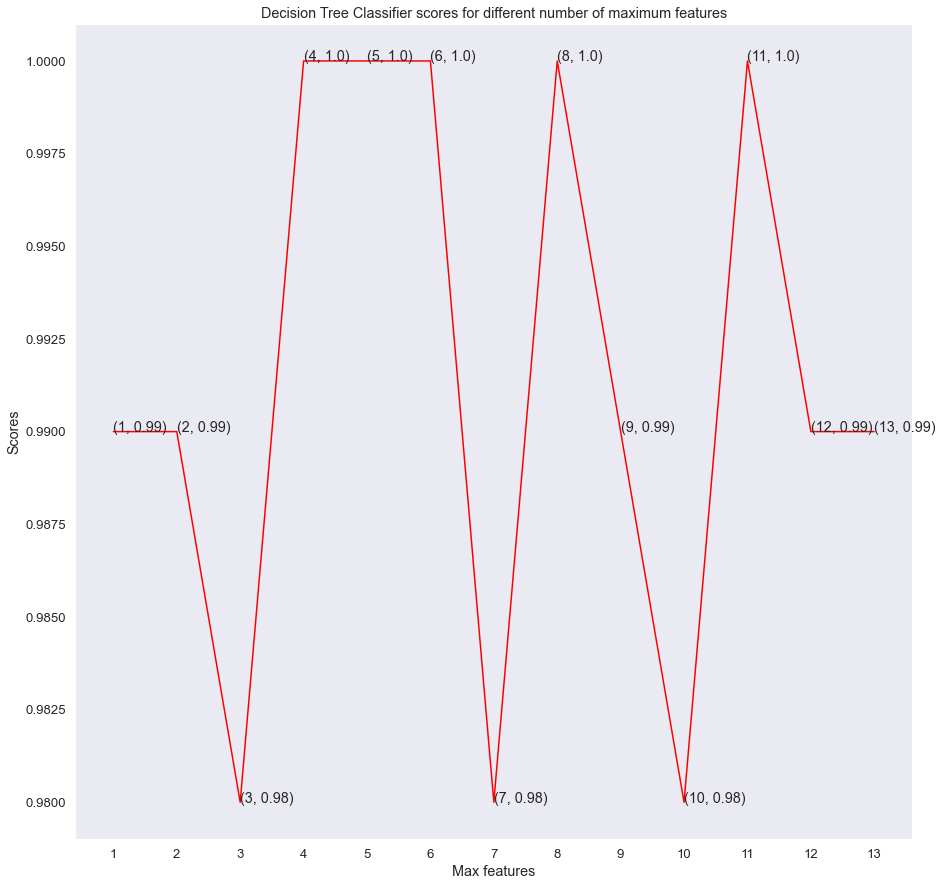

In [28]:
plt.figure(figsize=(15,15))
plt.grid(False)
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'red')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])

plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [ ]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[4]*100, [4,5,6,8,11]))

The score for Decision Tree Classifier is 100.0% with [4, 5, 6, 8, 11] maximum features.


### __Random Forest Classifier__
As the name suggests, "Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset."

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_score = []
estimators = [10, 50, 150, 250, 350, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0, ) #criterion = "entropy"
    rf_classifier.fit(X_train, y_train)
    rf_score.append(rf_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

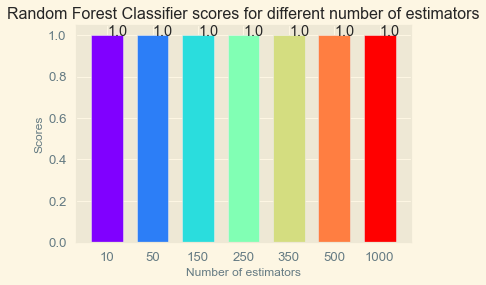

In [ ]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
# plt.grid(False)
plt.style.use('Solarize_Light2')
plt.bar([i for i in range(len(estimators))], rf_score, color = colors, width = 0.7)
for i in range(len(estimators)):
    plt.text(i, rf_score[i], rf_score[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel("Number of estimators")
plt.ylabel("Scores")
plt.title("Random Forest Classifier scores for different number of estimators")

### __Conclusion__
In this tutorial, we implemented various ML algorithms (__Support Vector, Decision Tree and Random Forest classifier__) to the classification of heart disease. In algorithm is provided with a detailed description on the implementation and a result on the test set is provided.